In [146]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns

import random

In [147]:
# Importing dataset
df = pd.read_csv("df.csv")
df

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Inflight Entertainment
0,A320,Couple Leisure,Business Class,Tenerife to Gatwick,August 2023,1.0,3.0,1.0,1.0,1.0,1,no,NaN
1,A320,Business,Business Class,London Heathrow to Malaga,August 2023,2.0,2.0,2.0,1.0,1.0,2,no,NaN
2,NaN,Couple Leisure,Economy Class,Newark to London,June 2023,NaN,NaN,NaN,NaN,NaN,1,no,NaN
3,NaN,Business,Business Class,London to Johannesburg,August 2023,3.0,2.0,NaN,2.0,NaN,1,no,NaN
4,Boeing 777-300,Couple Leisure,Business Class,LHR to LAX,August 2023,4.0,5.0,3.0,5.0,NaN,4,yes,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,NaN,NaN,Economy Class,NaN,NaN,4.0,3.0,1.0,NaN,NaN,1,no,3.0
3496,NaN,NaN,Business Class,NaN,NaN,4.0,2.0,4.0,NaN,NaN,5,yes,3.0
3497,NaN,NaN,Business Class,NaN,NaN,5.0,5.0,4.0,NaN,NaN,5,yes,4.0
3498,NaN,NaN,Premium Economy,NaN,NaN,3.0,4.0,3.0,NaN,NaN,3,no,1.0


In [148]:
# Shape of the dataset
df.shape

(3500, 13)

In [149]:
# Information regarding dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft                1886 non-null   object 
 1   Type Of Traveller       2863 non-null   object 
 2   Seat Type               3498 non-null   object 
 3   Route                   2858 non-null   object 
 4   Date Flown              2855 non-null   object 
 5   Seat Comfort            3390 non-null   float64
 6   Cabin Staff Service     3380 non-null   float64
 7   Food & Beverages        3129 non-null   float64
 8   Ground Service          2789 non-null   float64
 9   Wifi & Connectivity     582 non-null    float64
 10  Value For Money         3500 non-null   int64  
 11  Recommended             3500 non-null   object 
 12  Inflight Entertainment  2393 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 355.6+ KB


In [150]:
# Null values in dataset?
df.isnull().sum()

Aircraft                  1614
Type Of Traveller          637
Seat Type                    2
Route                      642
Date Flown                 645
Seat Comfort               110
Cabin Staff Service        120
Food & Beverages           371
Ground Service             711
Wifi & Connectivity       2918
Value For Money              0
Recommended                  0
Inflight Entertainment    1107
dtype: int64

In [151]:
# Checking the percentage of data missing in each column
df.isnull().mean()*100

Aircraft                  46.114286
Type Of Traveller         18.200000
Seat Type                  0.057143
Route                     18.342857
Date Flown                18.428571
Seat Comfort               3.142857
Cabin Staff Service        3.428571
Food & Beverages          10.600000
Ground Service            20.314286
Wifi & Connectivity       83.371429
Value For Money            0.000000
Recommended                0.000000
Inflight Entertainment    31.628571
dtype: float64

# Dropping duplicate values

In [152]:
# Is there any duplicate value in dataset?
df.duplicated().sum()

162

In [153]:
# Dropping the duplicate value
df = df.drop_duplicates()

# Data Cleaning on 'Aircraft' column

In [154]:
# Fill missing values in the 'Aircraft' column with "Not available"
df['Aircraft'] = df['Aircraft'].fillna("Not available")

C:\Users\dell\AppData\Local\Temp\ipykernel_5696\2451935790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Aircraft'] = df['Aircraft'].fillna("Not available")


In [155]:
# Count the occurrences of each aircraft type in the 'Aircraft' column
df['Aircraft'].value_counts()

Not available              1456
A320                        348
Boeing 777                  266
Boeing 747-400              181
A380                        164
                           ... 
Boeing 777-300ER / A320       1
Boeing 747 / A320             1
A230                          1
A380 and 747                  1
Airbus 319                    1
Name: Aircraft, Length: 200, dtype: int64

In [156]:
# Calculate the value counts for the 'Aircraft' column
value_counts = df['Aircraft'].value_counts()

# Extract values occurring less than 40 times
values_less_than_40 = value_counts[value_counts < 40].index.tolist()

# Print the number of values occurring less than 40 times
print("Number of aircrafts occurring less than 40 times :", len(values_less_than_40))

Number of aircrafts occurring less than 40 times : 189


In [157]:
# Count the occurrences of each aircraft type in the DataFrame
value_counts = df['Aircraft'].value_counts()

# Extract values occurring less than 40 times
values_less_than_40 = value_counts[value_counts < 40].index.tolist()

# Replace values less than 40 with 'Other'
df['Aircraft'] = df['Aircraft'].apply(lambda x: 'Other' if x in values_less_than_40 else x)

C:\Users\dell\AppData\Local\Temp\ipykernel_5696\3484987325.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Aircraft'] = df['Aircraft'].apply(lambda x: 'Other' if x in values_less_than_40 else x)


<AxesSubplot:>

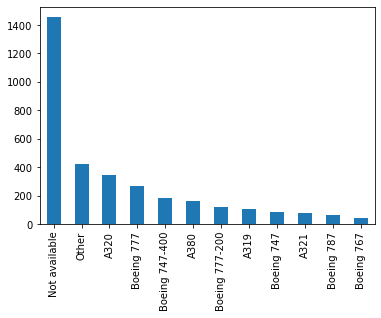

In [158]:
# This code snippet is used to create a bar chart showing the counts of unique values in the 'Aircraft' column of the 'df'.
# First, we use df['Aircraft'].value_counts() to count the occurrences of each unique value in the 'Aircraft' column.
# Then, we use .plot(kind='bar') to create a bar chart from the value counts data.

df['Aircraft'].value_counts().plot(kind='bar')

# Data Cleaning on 'Type Of Traveller' column

In [159]:
# Count the number of null values in the 'Type Of Traveller' column
df['Type Of Traveller'].isnull().sum()

480

In [160]:
# Count the occurrences of each unique value in the 'Type Of Traveller' column
df['Type Of Traveller'].value_counts()

Couple Leisure    962
Solo Leisure      873
Business          629
Family Leisure    394
Name: Type Of Traveller, dtype: int64

In [161]:
# Create a list of existing values in the 'Type Of Traveller' column without NaNs
existing = df['Type Of Traveller'].dropna().tolist()

# Fill missing values with existing random values
for index, row in df.iterrows():
    if pd.isna(row['Type Of Traveller']):
        df.at[index, 'Type Of Traveller'] = random.choice(existing)

In [162]:
# Count the occurrences of each unique value in the 'Type Of Traveller' column
df['Type Of Traveller'].value_counts()

Couple Leisure    1127
Solo Leisure      1032
Business           722
Family Leisure     457
Name: Type Of Traveller, dtype: int64

<AxesSubplot:>

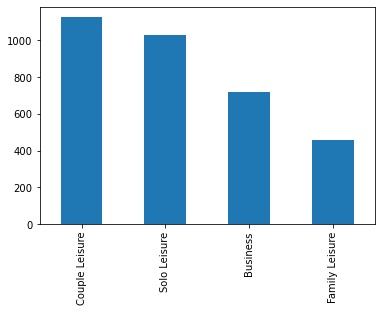

In [163]:
# Plotting a bar chart to visualize the count of different types of travelers
df['Type Of Traveller'].value_counts().plot(kind='bar')

# Data Cleaning on 'Seat Type' column

In [164]:
# Count the number of missing (null) values in the 'Seat Type' column of DataFrame 'df'
df['Seat Type'].isnull().sum()

2

In [165]:
# Extract the existing non-null values of 'Seat Type' and convert them to a list
existing = df['Seat Type'].dropna().tolist()

# Fill missing values in 'Seat Type' with random values from the existing list
for index, row in df.iterrows():
    if pd.isna(row['Seat Type']):
        df.at[index, 'Seat Type'] = random.choice(existing)

In [166]:
# Count the occurrences of each unique value in the 'Seat Type' column of the DataFrame 'df'
seat_type_counts = df['Seat Type'].value_counts()

<AxesSubplot:>

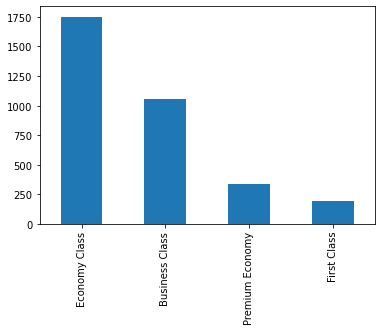

In [167]:
# Plot a bar chart to visualize the counts of different seat types in the 'Seat Type' column of the DataFrame 'df'.
df['Seat Type'].value_counts().plot(kind='bar')

# Data Cleaning on 'Route' column

In [168]:
# Count the number of missing (null) values in the 'Route' column of DataFrame 'df'
df['Route'].isnull().sum()

485

In [169]:
# Count the occurrences of each unique value in the 'Route' column
df['Route'].value_counts()

London to Johannesburg               17
London to Cape Town                  15
BKK to LHR                           13
Cape Town to London                  13
Johannesburg to London               13
                                     ..
London Gatwick to Tirana Rinas        1
London Heathrow to Seattle Tacoma     1
Heathrow to Milan                     1
New York to Nairobi via London        1
BOM-LHR                               1
Name: Route, Length: 1562, dtype: int64

In [170]:
# Create a list of existing routes without missing values
existing = df['Route'].dropna().tolist()

# Fill missing values with random values from the existing routes
for index, row in df.iterrows():
    if pd.isna(row['Route']):
        df.at[index, 'Route'] = random.choice(existing)

In [171]:
# Calculate the count of each unique value in the 'Route' column
value_counts = df['Route'].value_counts()

# Extract values occurring less than 12 times
values_less_than_12 = value_counts[value_counts < 12].index.tolist()

# Replace values less than 12 with 'Other'
df['Route'] = df['Route'].apply(lambda x: 'Other' if x in values_less_than_12 else x)

C:\Users\dell\AppData\Local\Temp\ipykernel_5696\2339589395.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Route'] = df['Route'].apply(lambda x: 'Other' if x in values_less_than_12 else x)


In [172]:
# Count the occurrences of each unique value in the 'Route' column
df['Route'].value_counts()

Other                     3172
London to Johannesburg      22
London to Hong Kong         17
London to Cape Town         17
Vancouver to London         16
Johannesburg to London      15
Cape Town to London         14
LHR to MIA                  14
London to Athens            13
LHR to HKG                  13
BKK to LHR                  13
New York to London          12
Name: Route, dtype: int64

# Data Cleaning on 'Date Flown' column

In [173]:
# Count the occurrences of each date in the 'Date Flown' column
df['Date Flown'].value_counts()

August 2015       82
September 2015    78
April 2017        65
October 2015      64
November 2015     64
                  ..
November 2014      2
October 2014       1
June 2020          1
August 2014        1
July 2014          1
Name: Date Flown, Length: 109, dtype: int64

In [174]:
# Create a list of existing dates from the 'Date Flown' column without NaN values
existing = df['Date Flown'].dropna().tolist()

# Fill missing values with random dates from the existing routes
for index, row in df.iterrows():
    if pd.isna(row['Date Flown']):
        df.at[index, 'Date Flown'] = random.choice(existing)

In [175]:
# Count the occurrences of each date in the 'Date Flown' column
value_counts = df['Date Flown'].value_counts()

# Extract values occurring less than 35 times
values_less_than_35 = value_counts[value_counts < 35].index.tolist()

# Replace values less than 35 with 'Other'
df['Date Flown'] = df['Date Flown'].apply(lambda x: 'Other' if x in values_less_than_35 else x)

C:\Users\dell\AppData\Local\Temp\ipykernel_5696\1927361504.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date Flown'] = df['Date Flown'].apply(lambda x: 'Other' if x in values_less_than_35 else x)


In [176]:
# Count the occurrences of each date in the 'Date Flown' column
df['Date Flown'].value_counts()

Other             1057
August 2015         99
September 2015      91
November 2015       82
April 2017          80
December 2015       72
October 2015        71
January 2017        69
July 2015           68
June 2017           67
November 2016       66
September 2016      65
December 2016       63
October 2016        62
March 2016          62
February 2017       62
March 2017          58
August 2016         56
May 2016            55
October 2017        55
May 2017            52
July 2017           51
August 2017         50
September 2017      50
January 2016        49
February 2016       48
June 2016           45
April 2016          45
November 2017       43
July 2016           43
May 2019            43
May 2018            43
March 2018          42
October 2019        41
March 2023          41
June 2015           41
September 2019      37
July 2019           36
January 2020        36
August 2019         36
November 2019       36
June 2018           35
December 2018       35
Name: Date 

# Data Cleaning on 'Seat Comfort' column

In [177]:
# Count the occurrences of each date in the 'Seat Comfort' column
df['Seat Comfort'].value_counts()

3.0    789
1.0    747
4.0    718
2.0    566
5.0    408
Name: Seat Comfort, dtype: int64

In [178]:
# Count the number of null values in the 'Seat Comfort' column of the DataFrame df
df['Seat Comfort'].isnull().sum()

110

In [179]:
# Calculate the median value of 'Seat Comfort' in the DataFrame 'df'
median_seat_comfort = df['Seat Comfort'].median()

# Fill missing values in the 'Seat Comfort' column with the calculated median value
df['Seat Comfort'] = df['Seat Comfort'].fillna(median_seat_comfort)

C:\Users\dell\AppData\Local\Temp\ipykernel_5696\3306413471.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Seat Comfort'] = df['Seat Comfort'].fillna(median_seat_comfort)


<AxesSubplot:>

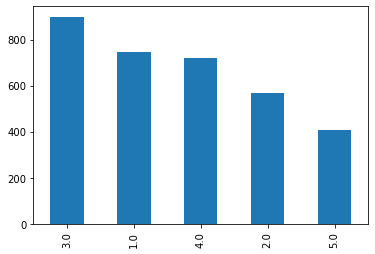

In [180]:
# Plotting a bar chart to visualize the distribution of Seat Comfort ratings
df['Seat Comfort'].value_counts().plot(kind='bar')

# Data Cleaning on 'Cabin Staff Service' column

In [181]:
# Count the number of missing values in the 'Cabin Staff Service' column
df['Cabin Staff Service'].isnull().sum()

120

In [182]:
# Calculate the median value of 'Cabin Staff Service' to fill missing values
median_Cabin_Staff_Service = df['Cabin Staff Service'].median()

# Fill missing values in 'Cabin Staff Service' with the calculated median
df['Cabin Staff Service'] = df['Cabin Staff Service'].fillna(median_Cabin_Staff_Service)

C:\Users\dell\AppData\Local\Temp\ipykernel_5696\1407319903.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabin Staff Service'] = df['Cabin Staff Service'].fillna(median_Cabin_Staff_Service)


<AxesSubplot:>

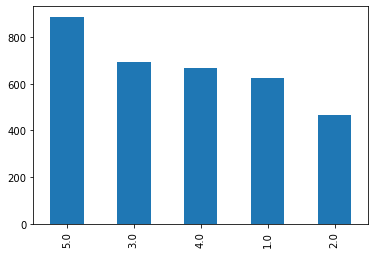

In [183]:
# Plot a bar chart to visualize the distribution of 'Cabin Staff Service' values
df['Cabin Staff Service'].value_counts().plot(kind='bar')

# Data Cleaning on 'Food & Beverages' column

In [184]:
# Count the number of null values in the 'Food & Beverages' column of the DataFrame df
df['Food & Beverages'].isnull().sum()

371

In [185]:
# Count the occurrences of each unique value in the 'Food & Beverages' column
df['Food & Beverages'].value_counts()

1.0    906
4.0    573
3.0    559
2.0    532
5.0    396
0.0      1
Name: Food & Beverages, dtype: int64

In [186]:
# Filter the DataFrame 'df' to remove rows where the 'Food & Beverages' column is equal to 0
df = df[df['Food & Beverages'] != 0]

In [187]:
# Count the occurrences of each unique value in the 'Food & Beverages' column
df['Food & Beverages'].value_counts()

1.0    906
4.0    573
3.0    559
2.0    532
5.0    396
Name: Food & Beverages, dtype: int64

In [188]:
# Calculate the median of the 'Food & Beverages' column
median_Food_Beverages = df['Food & Beverages'].median()

# Fill missing values in the 'Food & Beverages' column with the calculated median
df['Food & Beverages'] = df['Food & Beverages'].fillna(median_Food_Beverages)

<AxesSubplot:>

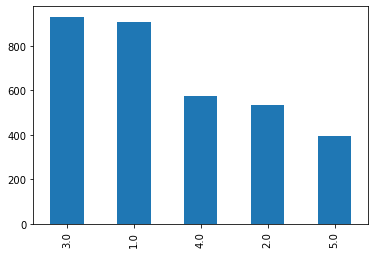

In [189]:
# Plot a bar chart to visualize the value counts of the 'Food & Beverages' column in the DataFrame 'df'.
df['Food & Beverages'].value_counts().plot(kind='bar')

# Data Cleaning on 'Inflight Entertainment' column

In [190]:
# Check how many values in the 'Inflight Entertainment' column of the DataFrame 'df' are null (missing)
df['Inflight Entertainment'].isnull().sum()

1107

In [191]:
# Get a list of existing ratings from the 'Inflight Entertainment' column and drop any NaN values
existing = df['Inflight Entertainment'].dropna().tolist()

# Fill missing values with existing random values
for index, row in df.iterrows():
    if pd.isna(row['Inflight Entertainment']):
        df.at[index, 'Inflight Entertainment'] = random.choice(existing)

In [192]:
# Count the occurrences of each value in the 'Inflight Entertainment' column
df['Inflight Entertainment'].value_counts()

1.0    993
3.0    744
4.0    605
2.0    593
5.0    399
0.0      3
Name: Inflight Entertainment, dtype: int64

In [193]:
# Filter the DataFrame 'df' to remove rows where 'Inflight Entertainment' is equal to 0
df = df[df['Inflight Entertainment'] != 0]

<AxesSubplot:>

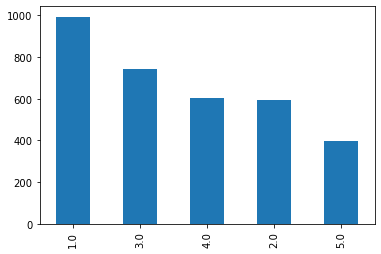

In [194]:
# Plot a bar chart to visualize the counts of 'Inflight Entertainment' values in the DataFrame 'df'
df['Inflight Entertainment'].value_counts().plot(kind='bar')

# Data Cleaning on 'Ground Service' column

In [195]:
# Count the number of null values in the 'Ground Service' column
df['Ground Service'].isnull().sum()

550

In [196]:
# Get a list of existing ratings from the 'Ground Service' column and drop any NaN values
existing = df['Ground Service'].dropna().tolist()

# Fill missing values with existing random values
for index, row in df.iterrows():
    if pd.isna(row['Ground Service']):
        df.at[index, 'Ground Service'] = random.choice(existing)

In [197]:
# Count the number of null values in the 'Ground Service' column
df['Ground Service'].isnull().sum()

0

In [198]:
# Count the occurrences of each value in the 'Inflight Entertainment' column
df['Ground Service'].value_counts()

1.0    1002
4.0     749
3.0     660
5.0     501
2.0     422
Name: Ground Service, dtype: int64

<AxesSubplot:>

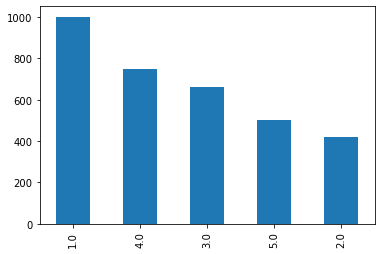

In [199]:
# Plot a bar chart to visualize the value counts of the 'Ground Service' column in the DataFrame 'df'.
df['Ground Service'].value_counts().plot(kind='bar')

# Data Cleaning on 'Wifi & Connectivity' column

In [200]:
# Count the number of null values in the 'Wifi & Connectivity' column
df['Wifi & Connectivity'].isnull().mean()*100

82.54349130173965

In [201]:
# As we can see that almost 83% of the data is missing from the 'Wifi & Connectivity' column, so it is better to drop this column

df.drop(columns=['Wifi & Connectivity'], inplace=True)

# Data Cleaning on 'Value For Money' column

In [202]:
# Count the number of null values in the 'Value For Money' column
df['Value For Money'].isnull().mean()*100

0.0

In [203]:
# Counting value of the 'Value For Money' column in the DataFrame 'df'.
df['Value For Money'].value_counts()

1    1102
3     624
4     593
2     545
5     470
Name: Value For Money, dtype: int64

<AxesSubplot:>

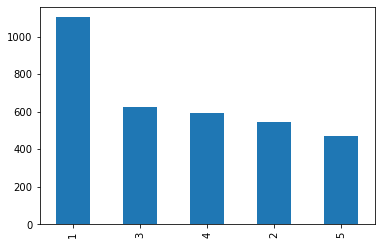

In [204]:
# Plot a bar chart to visualize the value counts of the 'Value For Money' column in the DataFrame 'df'.
df['Value For Money'].value_counts().plot(kind='bar')

# Data Cleaning on 'Recommended' column

In [205]:
# Count the number of null values in the 'Recommended' column
df['Recommended'].isnull().mean()*100

0.0

In [206]:
# Assuming df is your DataFrame

# Create a mapping dictionary
mapping = {'yes': 1, 'no': 0}

# Use the map function to replace values
df['Recommended'] = df['Recommended'].map(mapping)

In [207]:
# Counting value of the 'Recommended' column in the DataFrame 'df'.
df['Recommended'].value_counts()

0    2039
1    1295
Name: Recommended, dtype: int64

<AxesSubplot:>

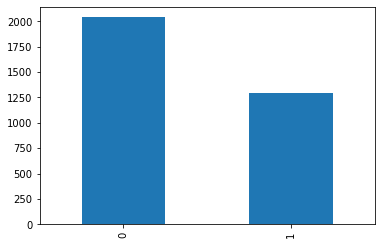

In [208]:
# Plot a bar chart to visualize the value counts of the 'Recommended column in the DataFrame 'df'.
df['Recommended'].value_counts().plot(kind='bar')

# Converting datatype of columns

In [209]:
columns_to_convert = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 
                      'Inflight Entertainment', 'Ground Service', 'Value For Money']

# Loop through the columns and convert to integer
for column in columns_to_convert:
    df[column] = df[column].astype(int)

# Reordering the columns

In [216]:
# Reorder the columns so that target column 'Recommended' is the last column
column_order = [col for col in df.columns if col != 'Recommended'] + ['Recommended']
df = df[column_order]

df

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Inflight Entertainment,Recommended
0,A320,Couple Leisure,Business Class,Other,Other,1,3,1,1,1,5,0
1,A320,Business,Business Class,Other,Other,2,2,2,1,2,5,0
2,Not available,Couple Leisure,Economy Class,Other,Other,3,3,3,1,1,3,0
3,Not available,Business,Business Class,London to Johannesburg,Other,3,2,3,2,1,2,0
4,Other,Couple Leisure,Business Class,Other,Other,4,5,3,5,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3494,Not available,Business,First Class,Other,Other,3,4,2,4,3,2,0
3495,Not available,Couple Leisure,Economy Class,Other,October 2017,4,3,1,4,1,3,0
3496,Not available,Couple Leisure,Business Class,Other,November 2015,4,2,4,2,5,3,1
3498,Not available,Business,Premium Economy,Other,July 2016,3,4,3,3,3,1,0


# Reviewing the data one time again after the cleaning

In [217]:
df

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Inflight Entertainment,Recommended
0,A320,Couple Leisure,Business Class,Other,Other,1,3,1,1,1,5,0
1,A320,Business,Business Class,Other,Other,2,2,2,1,2,5,0
2,Not available,Couple Leisure,Economy Class,Other,Other,3,3,3,1,1,3,0
3,Not available,Business,Business Class,London to Johannesburg,Other,3,2,3,2,1,2,0
4,Other,Couple Leisure,Business Class,Other,Other,4,5,3,5,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3494,Not available,Business,First Class,Other,Other,3,4,2,4,3,2,0
3495,Not available,Couple Leisure,Economy Class,Other,October 2017,4,3,1,4,1,3,0
3496,Not available,Couple Leisure,Business Class,Other,November 2015,4,2,4,2,5,3,1
3498,Not available,Business,Premium Economy,Other,July 2016,3,4,3,3,3,1,0


In [218]:
# Null values in dataset?
df.isnull().sum()

Aircraft                  0
Type Of Traveller         0
Seat Type                 0
Route                     0
Date Flown                0
Seat Comfort              0
Cabin Staff Service       0
Food & Beverages          0
Ground Service            0
Value For Money           0
Inflight Entertainment    0
Recommended               0
dtype: int64

In [219]:
# Is there any duplicate value in dataset?
df.duplicated().sum()

0

In [220]:
# Dropping the duplicate value
df = df.drop_duplicates()

In [221]:
# Shape of dataset
df.shape

(3258, 12)

In [222]:
df.to_csv('df.csv', index=False)